### Data Set Summary and Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used basic numpy functionality (img.shape) to determine the parameters of the dataset. I used pandas to read the .csv of sign names into an ordered list.

* The size of training set is 34799.
* The size of the validation set is 4410.
* The size of test set is 12630.
* The shape of a traffic sign image is [32, 32].
* The number of unique classes/labels in the data set is 43.

#### 2. Include an exploratory visualization of the dataset.

Below is an exploratory visualization of the data set. It is a bar chart showing how the split between training, validation, and test data. Additionally, I have provided a random sampling of the training images.

Data loaded.


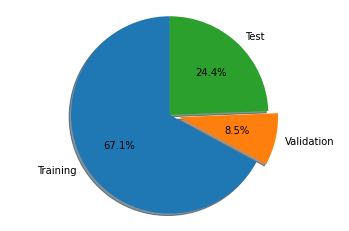

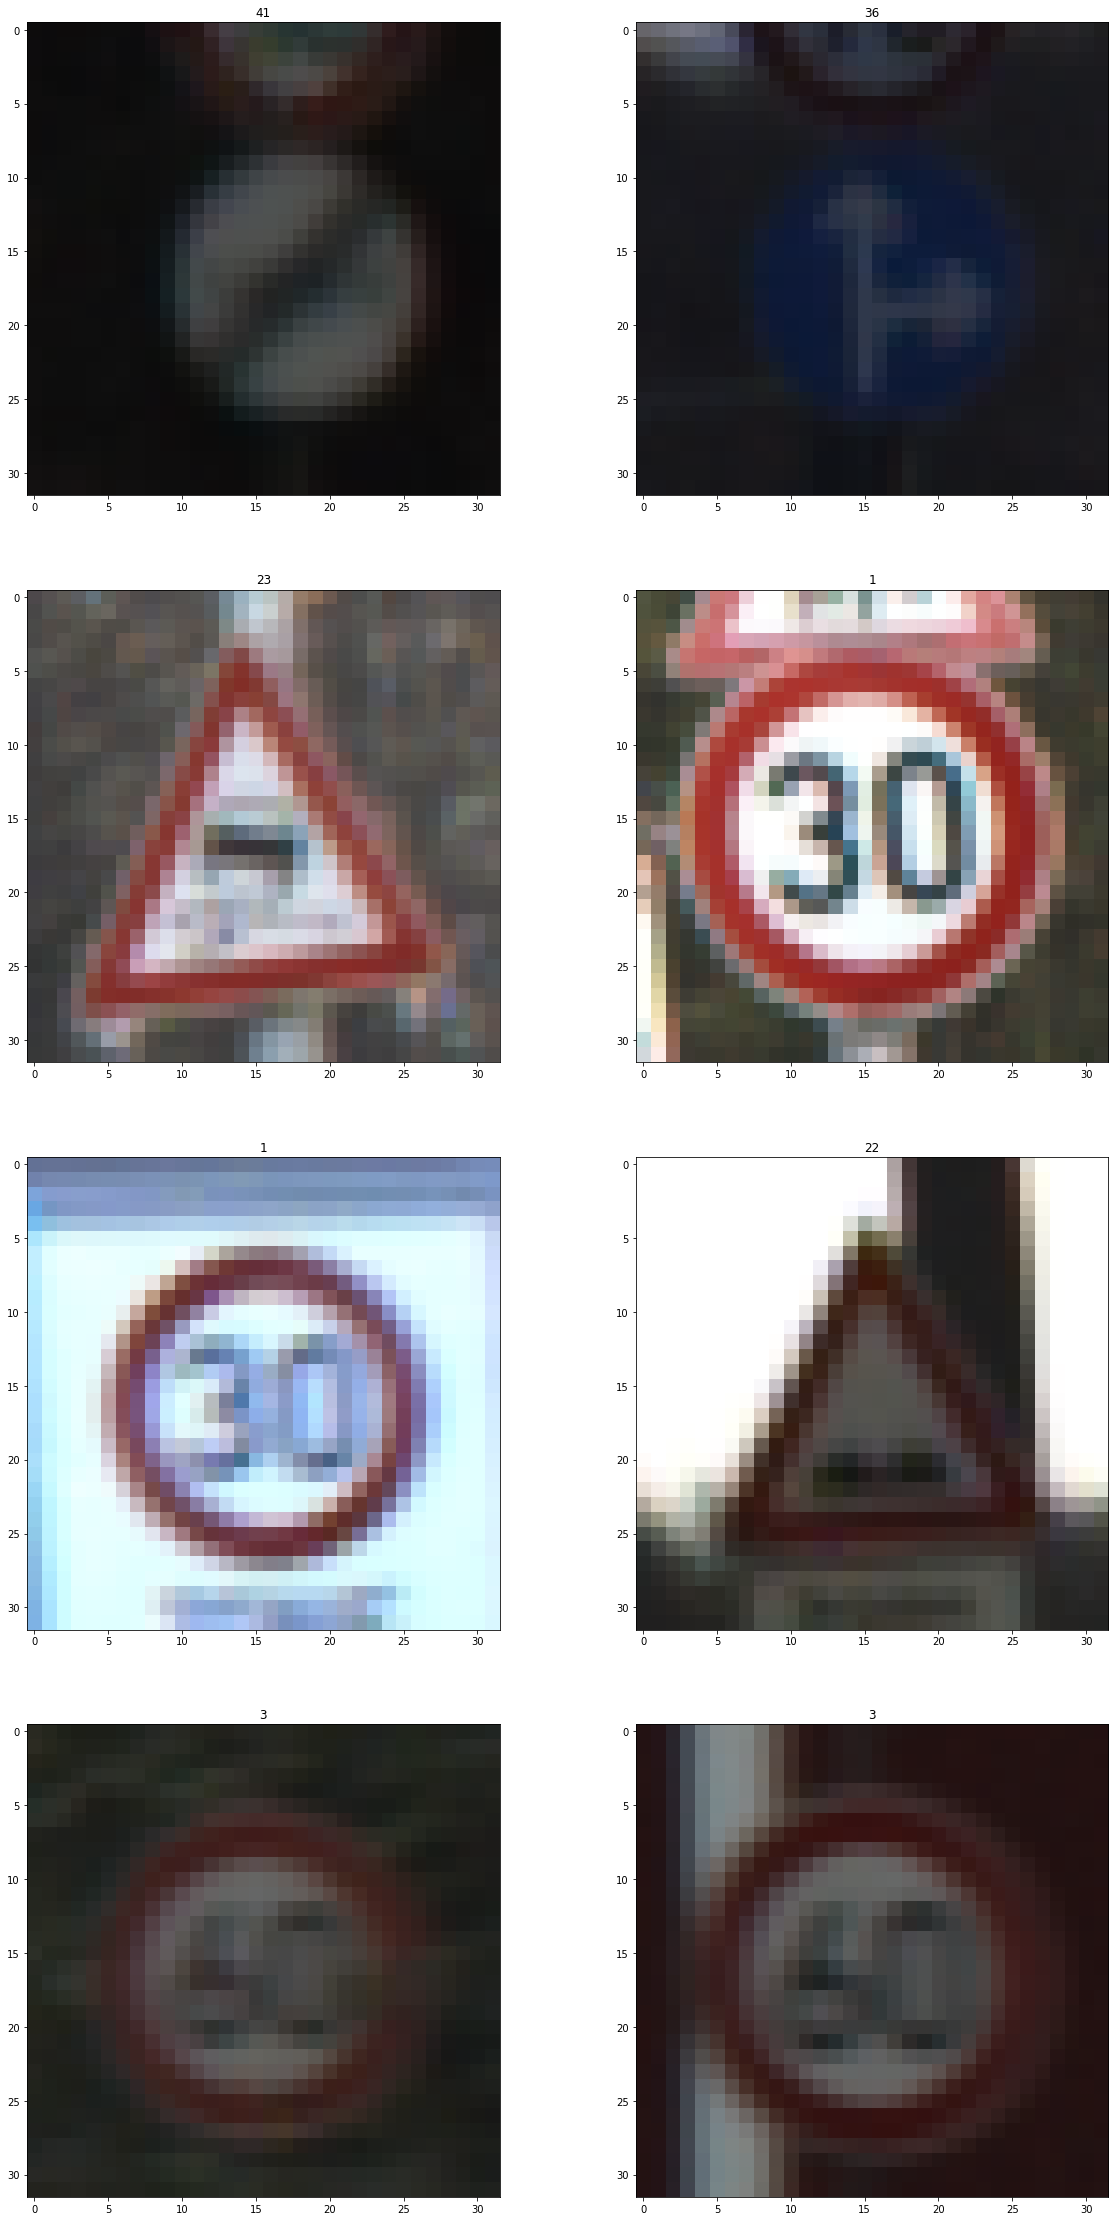

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas as pd

# Load pickled data

training_file = '../data/signs/train.p'
validation_file= '../data/signs/valid.p'
testing_file = '../data/signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Data loaded.")

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = [X_train.shape[2], X_train.shape[1]]

# How many unique classes/labels there are in the dataset.
signnames = pd.read_csv('signnames.csv')
n_classes = signnames.shape[0]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Training', 'Validation', 'Test'
sizes = [34799, 4410, 12630]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Data exploration visualization code

import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# Creates just a figure and only one subplot
num_rows = 4
num_cols = 2
subplot_idx = 0

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,40))

for row in np.arange(num_rows):
    for col in np.arange(num_cols):
        axes[row][col].imshow(X_valid[subplot_idx])
        axes[row][col].set_title(y_valid[subplot_idx])
        subplot_idx += 128

# Visualizations will be shown in the notebook.

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

I tried many methods of preprocessing the data. The majority of the techniques involving color processing simply reduced the performance of the model (converting to grayscale, HSV, etc). I first normalized the images to floats between 0 and 1 to minimize saturation of activation functions, then subtracted each color channel individually by its average to center it at 0.

##### Example preprocessed image:

<img src="./writeup_images/preprocessed_image.png">

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         						|     Description	        					| 
|:-------------------------------------:|:---------------------------------------------:| 
| Input         						| 32x32x3 RGB image   							| 
| Spatial transformer fully connected	| input 3072, output 3072						| 
| Spatial transformer fully connected	| input 3072, output 3072						| 
| Spatial transformer					| input raw image, output transformed image		| 
| Input         						| 32x32x3 transformed RGB image   				| 
| Convolution 5x5     					| 1x1 stride, valid padding, outputs 28x28x6 	|
| Leaky RELU							| alpha=0.2										|
| Max pooling	      					| 2x2 stride, outputs 14x14x6	 				|
| Convolution 5x5     					| 1x1 stride, valid padding, outputs 10x10x16 	|
| Leaky RELU							| alpha=0.2										|
| Max pooling	      					| 2x2 stride, outputs 5x5x16	 				|
| Fully connected						| input 400, output 120							|
| Leaky RELU							| alpha=0.2										|
| Dropout								| keep_prob=0.5									|
| Fully connected						| input 120, output 84							|
| Leaky RELU							| alpha=0.2										|
| Dropout								| keep_prob=0.5									|
| Fully connected						| input 84, output 43							|
| Softmax								| 43 classes									|

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* validation set accuracy of 0.986
* test set accuracy of 0.968

In theory, I could have used an unmodified random forest classifier from a library like scikit-learn and achieved a ~99% test accuracy, but that seemed to go against the spirit of this project.

I began with the standard LeNet architecture. After preprocessing the input data, I had a validation accuracy of ~94%, but I felt that this was too easy of an approach and could be improved. I constantly struggled with over-fitting, but reducing the number of neurons always led to under-fitting; a decreased performance in both the training and validation accuracy. This intuitively makes sense, because the LeNet architecture was already created to be as simple as possible for a very simple task.

Adding additional convolution layers and fully-connected layers did not help either. Any additional layers reduced validation accuracy, indicating further over-fitting. Furthermore, any changes whatsoever in the convolutional layers (increasing depth, increasing kernel size, etc) all resulted in a drop in performance. I do not know why this was the case, but I assume it is because Yann LeCun is one of the (if not *the*) world's leading expert in convolutional neural networks, and my naive modifications to his architecture were not likely to improve upon what has lasted for decades as an archetypal design for a simple CNN.

Dropout in the convolutional layers decreased performance as well, which confused me at first, but [this essay](https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html) helped shed some light on the fact that using dropout in the early layers causes a loss of information that propagates through the rest of the network. Ultimately, using dropout in the final fully-connected layers resulted in a slight improvement in performance.

However, I was still unsatisfied with the network performance. After reading [various whitepapers](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), I discovered [Spatial Transformers](https://arxiv.org/pdf/1506.02025.pdf). I will not pretend to fully understand how they work, but at a high level, a spatial transformer uses a small fully-connected "transformation network" (in my case, a two-layer fully-connected network) to compute the six parameters of an [affine transformation](https://people.cs.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf), which it then applies to the input image to skew it into a more readily recognizable form. I used the [spatial transformer](https://github.com/tensorflow/models/blob/master/research/transformer/spatial_transformer.py) module from the official [Tensorflow Research](https://github.com/tensorflow/models/tree/master/research) GitHub for the affine transformation graph, but I had to design the transformer network myself. I saw maximum improvement using a two-layer fully-connected network.

After adding the spatial transformer and switching my activation function to [Leaky ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7) to avoid dead neurons, I was able to achieve a satisfactory network performance.

# MODEL TRAINING: 

The following hyperparameters were used for training the network.

learning rate: 0.0005

optimizer: AdamOptimizer

batch size: 128

epochs: 115

dropout probability: 0.5

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

#### Sign 1
This image may prove to be difficult due to the watermark.

<img src="./new_images/traffic_sign_1.jpg">

#### Sign 2
This image may prove difficult due to the second sign beneath the main one.

<img src="./new_images/traffic_sign_2.dms">

#### Sign 3
This sign is at an angle, which could confuse the network.

<img src="./new_images/traffic_sign_3.png">

#### Sign 4
This sign exceeds the boundaries of the image, which the pre-formatted dataset does not do. This could confuse the network.

<img src="./new_images/traffic_sign_4.jpg">

#### Sign 5
This sign should be OK.

<img src="./new_images/traffic_sign_5.jpg">

### Scaling

I scaled the images to match the network inputs:

<img src="./new_images/traffic_sign_1_scaled.png">
<img src="./new_images/traffic_sign_2_scaled.png">
<img src="./new_images/traffic_sign_3_scaled.png">
<img src="./new_images/traffic_sign_4_scaled.png">
<img src="./new_images/traffic_sign_5_scaled.png">

The fourth image might be difficult to classify because it passes beyond the borders of the image. I am interested to see whether or not the network can generalize to this novel image type.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 60 km/h      	    	| 60 km/h   									| 
| general caution		| bicycles crossing								|
| 50 km/h				| 60 km/h										|
| road work	      		| road work					    				|
| keep right			| keep right        							|


The model was able to correctly guess 3 of the 5 traffic signs, which gives an accuracy of 60%. This is a notable decrease in performance from the test set (96.8% accuracy). I will address this later in the writeup.

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

BEST: [array([ 3, 29,  3, 25, 38])]
TOP_K: TopKV2(values=array([[ 67.01799 ,  58.916737,  39.48736 ,  22.386717,  13.390722],
       [ 56.57375 ,  53.43289 ,  37.618496,  36.061993,  30.826622],
       [ 53.00022 ,  41.317917,  18.638298,  13.481089,   8.056367],
       [ 79.597046,  50.374435,  46.07565 ,  30.918032,  30.796247],
       [204.01436 ,  81.305115,  77.665184,  39.644238,  35.163292]],
      dtype=float32), indices=array([[ 3,  2,  5,  1, 15],
       [29, 22, 25, 24, 31],
       [ 3,  5, 35,  2,  6],
       [25, 22, 29, 20, 18],
       [38, 36, 34, 32, 13]], dtype=int32))

The code for making predictions on my final model is located in the 23rd cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a 60km/h speed limit (probability of 0.67), and the prediction is correct. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| Class | 
|:---------------------:|:---------------------------------------------:|:-----:| 
| .67         			| 60 km/h 										| 3		|
| .59     				| 50 km/h 										| 2		|
| .39					| 80 km/h 										| 5		|
| .22	      			| 30 km/h 						 				| 1		|
| .13				    | No vehicles 	     							| 15	|

For the second image, the model believes that this is a bicycles crossing sign (low probability of 0.57), and the prediction is incorrect. The correct answer (general caution) was not in the top 5 at all. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| Class | 
|:---------------------:|:---------------------------------------------:|:-----:| 
| .57         			| bicycles crossing 							| 29	|
| .53     				| bumpy road 									| 22	|
| .38					| road work 									| 25	|
| .36	      			| road narrows on right 		 				| 24	|
| .31				    | wild animals crossing 						| 31	|

For the third image, the model is believes that this is a 60km/h speed limit (probability of 0.53), and the prediction is incorrect. It is actually a 50 km/h speed limit. The mistake is understandable, as "5" and "6" look similar on the traffic signs. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| Class |
|:---------------------:|:---------------------------------------------:|:-----:| 
| .53         			| 60 km/h 										| 3		|
| .41     				| 80 km/h 										| 5		|
| .19					| ahead only 									| 35	|
| .13	      			| 50 km/h 						 				| 2		|
| .08				    | end of speed limit (80km/h) 					| 6		|

For the fourth image, the model is quite sure that this is a road work sign (probability of 0.80), and the prediction is correct. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| Class | 
|:---------------------:|:---------------------------------------------:|:-----:| 
| .80         			| road work 									| 25	|
| .50     				| bumpy road 									| 22	|
| .46					| bicycles crossing 							| 29	|
| .31	      			| dangerous curve to the right 					| 20	|
| .31				    | general caution 	 							| 18	|

For the fifth image, the model is extremely sure that this is a keep right sign (probability of 2.04 -- how is this possible?), and the prediction is correct. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| Class | 
|:---------------------:|:---------------------------------------------:|:-----:| 
| 2.04         			| keep right 									| 38	|
| .81     				| go straight or right 							| 36	|
| .77					| turn left ahead 								| 34	|
| .40	      			| end of all speed and passing limits 			| 32	|
| .35				    | yield 			 							| 13	|